In [ ]:
# nama : Elia Sihite
import tensorflow as tf
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-22 02:24:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss  40%[=======>            ] 125.31M  1.54MB/s    in 2m 3s   

2021-06-22 02:26:22 (1.02 MB/s) - Read error at byte 131399680/322873683 (Connection reset by peer). Retrying.

--2021-06-22 02:26:23--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# melakukan split folder
!pip install split-folders
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/hasil_split/", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3545.10 files/s]


In [ ]:
base_dir = '/tmp/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir(base_dir)

['val', 'train']

In [ ]:
# membuat direktori rock, papers dan cissors pada direktori data training
train_rock_dir = os.path.join(base_dir, 'rock')
train_paper_dir = os.path.join(base_dir, 'paper')
train_scissors_dir = os.path.join(base_dir, 'scissors')

# membuat direktori rock, papers dan cissors pada direktori data validation
validation_rock_dir = os.path.join(base_dir, 'rock')
validation_paper_dir = os.path.join(base_dir, 'paper')
validation_scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator (
                  rescale = 1./255,
                  rotation_range = 20,
                  horizontal_flip = True,
                  shear_range = 0.15,
                  width_shift_range = 0.2, 
                  height_shift_range = 0.2, 
                  zoom_range= 0.15,
                  fill_mode = 'nearest')
test_datagen = ImageDataGenerator (
                  rescale = 1./255,
                  shear_range = 0.15,
                  width_shift_range = 0.2, 
                  height_shift_range = 0.2,
                  zoom_range= 0.15,
                  fill_mode = 'nearest')

In [ ]:
# image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# melatih latih model
history = model.fit(
            train_generator,
            steps_per_epoch=25, 
            epochs=25, 
            validation_data=validation_generator, 
            validation_steps=5,  
            verbose=2)

Epoch 1/25
25/25 - 48s - loss: 1.3484 - accuracy: 0.3413 - val_loss: 1.1260 - val_accuracy: 0.3812
Epoch 2/25
25/25 - 44s - loss: 1.0983 - accuracy: 0.4263 - val_loss: 0.8975 - val_accuracy: 0.5625
Epoch 3/25
25/25 - 43s - loss: 1.0501 - accuracy: 0.5700 - val_loss: 0.8188 - val_accuracy: 0.5938
Epoch 4/25
25/25 - 43s - loss: 0.8407 - accuracy: 0.6637 - val_loss: 0.7218 - val_accuracy: 0.6125
Epoch 5/25
25/25 - 43s - loss: 0.6399 - accuracy: 0.7287 - val_loss: 0.4409 - val_accuracy: 0.8375
Epoch 6/25
25/25 - 43s - loss: 0.5765 - accuracy: 0.7775 - val_loss: 0.6138 - val_accuracy: 0.7250
Epoch 7/25
25/25 - 44s - loss: 0.4697 - accuracy: 0.8213 - val_loss: 0.8264 - val_accuracy: 0.7688
Epoch 8/25
25/25 - 43s - loss: 0.4756 - accuracy: 0.8062 - val_loss: 0.2682 - val_accuracy: 0.9125
Epoch 9/25
25/25 - 43s - loss: 0.4680 - accuracy: 0.8425 - val_loss: 0.2474 - val_accuracy: 0.9500
Epoch 10/25
25/25 - 43s - loss: 0.2749 - accuracy: 0.9050 - val_loss: 0.6692 - val_accuracy: 0.7937
Epoch 11/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


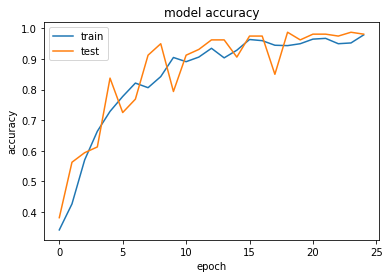

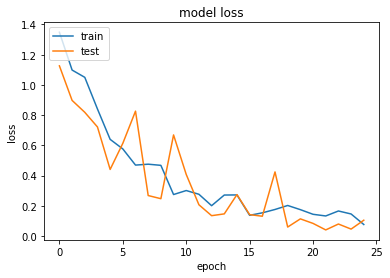

In [21]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 1wk2Hl1Ih9guOwx6.png to 1wk2Hl1Ih9guOwx6.png
1wk2Hl1Ih9guOwx6.png
rock


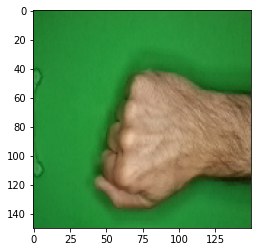

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
      print('paper')
  elif output_class==1:
      print('rock')
  else:
      print('scissors')